# To use sql_magic:
* Must use spark version > 2.0.0 

In [1]:
import sys, os

In [2]:
!echo $SPARK_HOME
!echo $SPARK_CONF_DIR
!echo $PYSPARK_PYTHON
!echo $PYSPARK_DRIVER_PYTHON
!echo $PYSPARK_SUBMIT_ARGS

print spark

/opt/alti-spark-2.1.1
/etc/alti-spark-2.1.1
/opt/rh/python27/root/usr/bin/python
/usr/bin/python



In [3]:
# Print path to make sure we are in right place
print sys.executable
# Try to load sql_magic right away - early detect errors
%load_ext sql_magic
# Set the connection name
%config SQL.conn_name = 'spark'

/home/tnystrand/anaconda2/envs/py27/bin/python


In [4]:
%%read_sql
use cluster_metrics_prod_2

Query started at 06:12:20 PM UTC; Query executed in 0.02 m

In [5]:
%%read_sql -a df_fact
select sum(slothours) as sh, date, system from job_fact where date>'2017-12-01' and system='dogfood' group by date, system

Query started at 06:12:21 PM UTC

In [6]:
%read_sql select sum(slothours), date as sh, system from job_fact where date>'2017-12-20' and system='dogfood' group by date,system

Query started at 06:12:51 PM UTC; Query executed in 0.29 m

,sum(slothours),sh,system
0,2667.388178,2018-01-05,dogfood
1,541.413670,2018-01-09,dogfood
2,2288.782411,2018-01-06,dogfood
3,2309.390251,2018-01-10,dogfood
4,720.272636,2018-01-12,dogfood
5,0.000000,2017-12-26,dogfood
6,0.000000,2017-12-30,dogfood
7,1312.483709,2018-01-02,dogfood
8,718.717338,2017-12-21,dogfood
9,739.656004,2018-01-13,dogfood


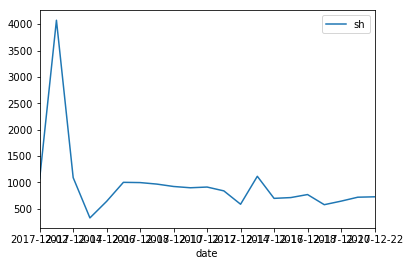

In [28]:
%matplotlib inline
df_fact.plot('date', 'sh', kind='line')